#  setup environment

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import zipfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import PIL
from PIL import Image

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

# extracting bangla dataset 

In [4]:
## file structure- zipFileName/classes/img.class
num_classes=10
np.random.seed(133)
data_root='.'
full_filename=os.path.join(data_root, 'BanglaLekha_mini.zip')


def maybe_extract(filename, force=False):
    root=os.path.splitext(os.path.splitext(filename)[0])[0]
    root=root #as the classesdata are in images folder
    if os.path.isdir(root)and not force:
        print('%s already present - Skipping extraction of %s' %(root, filename))
    else:
        print('extracting data %s.this may take a while .please wait.' %root)
        zip=zipfile.ZipFile(filename)
        sys.stdout.flush()
        zip.extractall(data_root)
        zip.close()
    data_folders = [
        os.path.join(root, d)for d in sorted(os.listdir(root)) #listing all the classes directory
        if os.path.isdir(os.path.join(root, d))]
    if len(data_folders) !=num_classes: #checks lengths
        raise Exception(
            'Expected %d folders , one per class. found %d instead.' % (
                num_classes,len(data_folders)))
    print(data_folders)
    return data_folders

full_folders=maybe_extract(full_filename)
        

.\BanglaLekha_mini already present - Skipping extraction of .\BanglaLekha_mini.zip
['.\\BanglaLekha_mini\\1', '.\\BanglaLekha_mini\\10', '.\\BanglaLekha_mini\\2', '.\\BanglaLekha_mini\\3', '.\\BanglaLekha_mini\\4', '.\\BanglaLekha_mini\\5', '.\\BanglaLekha_mini\\6', '.\\BanglaLekha_mini\\7', '.\\BanglaLekha_mini\\8', '.\\BanglaLekha_mini\\9']


# Image padding

In [ ]:
def imagepad():
    size = 28, 28
    root='.'
    filename= os.path.join( root, 'BanglaLekha_mini') 
    data_folders = [os.path.join(filename, d)for d in sorted(os.listdir(filename))
                    if os.path.isdir(os.path.join(filename, d))]
    print(filename)
    for folder in data_folders:
        print(folder)
        image_files=os.listdir(folder)
        for image in image_files:
            infile=os.path.join(folder,image)
            print (infile)
            #infile="shoro1.png"
            #for infile in sys.argv[1:]:
            outfile = os.path.splitext(infile)[0]
            try:
                im = Image.open(infile)
                im.thumbnail(size, Image.ANTIALIAS)
                #im.save("beforePaddign1.png")
                background= Image.new('1',size )#1 (1-bit pixels, black and white, stored with one pixel per byte)
                background.paste(im, (int((size[0]-im.size[0])/2), int((size[1]-im.size[1])/2)))
                background.save(infile)



            except IOError:
                print (infile)
                #return background
imagepad()

# Convert images into npArray and save into pickle file with separate class


In [5]:
image_size=28 #pixel width and height
pixel_depth=255.0 #Nurmber of levels per pixel

def load_letter(folder, min_num_images):
    """Load the data for a single letter label"""
    image_files=os.listdir(folder)
    dataset=np.ndarray(shape=(len(image_files),image_size, image_size),dtype=np.float32)
    print(folder)
    num_images=0
    for image in image_files:
        image_file=os.path.join(folder,image)
        try:
            image_data=(ndimage.imread(image_file).astype(float) - pixel_depth /2)/pixel_depth
            if image_data.shape !=(image_size,image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape),(image_file))
            dataset[num_images,:,:]=image_data
            num_images=num_images + 1
        except IOError as e:
            print('couldnot read :', image_file , ':', e , '-it\'s ok , skipping.')
    dataset=dataset[0:num_images, :, :]
    if num_images < min_num_images:
        raise Exception('many fewer images then expected: %d < %d' % (num_images, min_num_images))
    print('Full dataset tensor:', dataset.shape)
    print('mean:', np.mean(dataset))
    print('standard deviation:', np.std(dataset))
    return dataset

def maybe_pickle(data_folders, min_num_images_per_class, force=False):
    dataset_names=[]
    for folder in data_folders:
        set_filename=folder+ '.pickle'
        dataset_names.append(set_filename)
        if os.path.exists(set_filename)and not force:
            print('%s already present - skipping pickling.' % set_filename)
        else:
            print('pickling %s.' % set_filename)
            dataset=load_letter(folder,min_num_images_per_class)
            try:
                with open(set_filename, 'wb')as f:
                    pickle.dump(dataset,f, pickle.HIGHEST_PROTOCOL)
            except Exception as e:
                print('Unable to save data to', set_filename, ':',e)
    return dataset_names
full_datasets=maybe_pickle(full_folders, 1970)#Not MNIST Large

#print (full_datasets.shape)








pickling .\BanglaLekha_mini\1.pickle.
.\BanglaLekha_mini\1
Full dataset tensor: (1975L, 28L, 28L)
mean: -0.328435
standard deviation: 0.377002
pickling .\BanglaLekha_mini\10.pickle.
.\BanglaLekha_mini\10
Full dataset tensor: (1981L, 28L, 28L)
mean: -0.285105
standard deviation: 0.41075
pickling .\BanglaLekha_mini\2.pickle.
.\BanglaLekha_mini\2
Full dataset tensor: (1980L, 28L, 28L)
mean: -0.343805
standard deviation: 0.36304
pickling .\BanglaLekha_mini\3.pickle.
.\BanglaLekha_mini\3
Full dataset tensor: (1979L, 28L, 28L)
mean: -0.361461
standard deviation: 0.345465
pickling .\BanglaLekha_mini\4.pickle.
.\BanglaLekha_mini\4
Full dataset tensor: (1982L, 28L, 28L)
mean: -0.35016
standard deviation: 0.356914
pickling .\BanglaLekha_mini\5.pickle.
.\BanglaLekha_mini\5
Full dataset tensor: (1982L, 28L, 28L)
mean: -0.349086
standard deviation: 0.357965
pickling .\BanglaLekha_mini\6.pickle.
.\BanglaLekha_mini\6
Full dataset tensor: (1982L, 28L, 28L)
mean: -0.333126
standard deviation: 0.372864


(1975, 28, 28)
1548400
[[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5
  -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
   0.5  0.5  0.5  0.5  0.5  0.5  0.

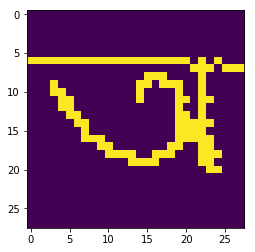

In [4]:

import matplotlib.image as mpimg
read_pickle = pickle.load( open( "BanglaLekha_mini/1.pickle", "rb" ) )
print (read_pickle.shape)
print (read_pickle.size)
#print (read_pickle)
print (read_pickle[0])
imgplot = plt.imshow(read_pickle[0])


 # shuffle images from each class to have random validation and training set then merge each classes into a single dataset

In [6]:
#print (train_dataset.shape)
def make_arrays(nb_rows, img_size):
    if nb_rows:
        dataset=np.ndarray((nb_rows, img_size , img_size), dtype=np.float32)
        labels=np.ndarray(nb_rows,dtype=np.float32)
    else:
        dataset,labels=None, None
    return dataset,labels
def merge_datasets(pickle_files,train_size, valid_size=0):
    num_classes= len(pickle_files)
    valid_dataset, valid_labels= make_arrays(valid_size, image_size)#for validation 
    train_dataset, train_labels= make_arrays(train_size, image_size)
    vsize_per_class= valid_size // num_classes
    tsize_per_class= train_size // num_classes
    
    start_v,start_t =0 , 0
    end_v, end_t =vsize_per_class , tsize_per_class
    end_l=vsize_per_class+tsize_per_class
    for label, pickle_file in enumerate(pickle_files):#label=value or index of pickle files,example A,B,C,D
        try:
            with open(pickle_file, 'rb') as f:
                letter_set=pickle.load(f)
                #shuffle the letters to have random validation and training set
                np.random.shuffle(letter_set)
                if valid_dataset is not None:
                    valid_letter=letter_set[:vsize_per_class, : , :]
                    valid_dataset[start_v:end_v, : , :] = valid_letter
                    valid_labels[start_v:end_v]= label
                    start_v +=vsize_per_class
                    end_v += vsize_per_class
                    
                train_letter= letter_set[vsize_per_class:end_l, :, :]
                train_dataset[start_t:end_t, : ,:]=train_letter
                train_labels[start_t:end_t]=label
                start_t +=tsize_per_class
                end_t += tsize_per_class
        except Exception as e:
            print('unable to process data from', pickle_file, '.', e)
            raise
    return valid_dataset,valid_labels,train_dataset, train_labels

train_size= 17900
valid_size=1000
test_size=1000

valid_dataset, valid_labels,train_dataset,train_labels = merge_datasets(full_datasets, train_size , valid_size)
test_dataset, test_labels,train_dataset,train_labels=merge_datasets(full_datasets,train_size,test_size)

print('training: ' ,train_dataset.shape , train_labels.shape)
print('validation :' , valid_dataset.shape , valid_labels.shape)
print('test :', test_dataset.shape , test_labels.shape)
                    

training:  (17900L, 28L, 28L) (17900L,)
validation : (1000L, 28L, 28L) (1000L,)
test : (1000L, 28L, 28L) (1000L,)


In [7]:
def randomize(dataset, labels):
    permutation = np.random.permutation(labels.shape[0])
    print (labels.shape[0])
    print (permutation)
    shuffled_dataset= dataset[permutation, : , :]
    shuffled_labels= labels[permutation]
    return shuffled_dataset, shuffled_labels
train_dataset , train_labels = randomize(train_dataset, train_labels)
test_dataset , test_labels = randomize(test_dataset, test_labels)
valid_dataset , valid_labels = randomize(valid_dataset, valid_labels)

    
    

17900
[11908 16022  6497 ...,  1326 16327  1818]
1000
[985 129 454 881 789 890 884 260 376 239 229 261 134 524 446 708 379 254
 246 423 885 938 954 892 792 914 569 345 364 784 969 787 722 840 727 833
 988 499 218 519 308 962  35  77 571 422 525 846 564 861 550 500 255 777
  99 839 790 267 928 414 544 889 664 338 157  39 766 205 697 128 707 137
 457 902 774 936  48  79 353 350 850 262 815 223 390 102 122  75 371 605
 374 106 349 788 912 594 570 537 794 506 874 333 378 197 958 136 728 293
 358 760 825  60  97 925 265  84 546 307 302 709 968 451 166 154 631 309
 948 593 401 621  30 118 806 907 984 900 665 528 762 489 965 484 886 199
 786 639 545 434 924 392 858 753 403 690 759 278 120 719 701 539 771 607
  37  67 165  72 356 931 217 421 340  68 974 795 935 744 466 147 595 541
  70 412 989 493 168 750 328 952 915 273 713 977  59  82 172 430 961 831
 896 536 869 186 686 680 312 490 535 504 693 225 842 318 269 529 171 810
 830 636  12 250 868 726 622 752 836  71 367 981 188 829 194 115 327 9

6.0


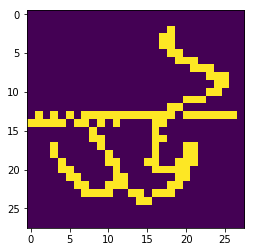

In [8]:
imgplot = plt.imshow(train_dataset [0])
print (train_labels[0])


# Saving Dataset

In [9]:
pickle_file = os.path.join(data_root, 'banglaLekha_mini.pickle')
try:
    f = open(pickle_file , 'wb')
    save= {
        'train_dataset' : train_dataset,
        'train_labels'  : train_labels,
        'valid_dataset' : valid_dataset,
        'valid_labels'  : valid_labels,
        'test_dataset'  : test_dataset,
        'test_labels'    : test_labels,
    }
    pickle.dump(save, f , pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('unable to save data to', pickle_file , ':', e)
    raise

In [10]:
statinfo= os.stat(pickle_file)
print('compressed pickcle size:', statinfo.st_size)

compressed pickcle size: 62486414


# Cleaning Dataset

In [11]:
import time
import hashlib

f=open(pickle_file, 'rb')
read_pickle = pickle.load( f )
train_dataset=read_pickle['train_dataset']
print(train_dataset)
train_labels=read_pickle['train_labels']
valid_dataset=read_pickle['valid_dataset']
valid_labels=read_pickle['valid_labels']
test_dataset=read_pickle['test_dataset']
test_labels=read_pickle['test_labels']



t1 = time.time()

train_hashes = [hashlib.sha1(x).digest() for x in train_dataset]
valid_hashes = [hashlib.sha1(x).digest() for x in valid_dataset]
test_hashes  = [hashlib.sha1(x).digest() for x in test_dataset]

valid_in_train = np.in1d(valid_hashes, train_hashes)
test_in_train  = np.in1d(test_hashes,  train_hashes)
test_in_valid  = np.in1d(test_hashes,  valid_hashes)

valid_keep = ~valid_in_train
test_keep  = ~(test_in_train | test_in_valid)

valid_dataset_clean = valid_dataset[valid_keep]
valid_labels_clean  = valid_labels [valid_keep]

test_dataset_clean = test_dataset[test_keep]
test_labels_clean  = test_labels [test_keep]

t2 = time.time()

print("Time: %0.2fs" % (t2 - t1))
print("valid -> train overlap: %d samples" % valid_in_train.sum())
print("test  -> train overlap: %d samples" % test_in_train.sum())
print("test  -> valid overlap: %d samples" % test_in_valid.sum())

[[[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  ..., 
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]]

 [[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [ 0.5  0.5  0.5 ..., -0.5 -0.5 -0.5]
  [ 0.5  0.5  0.5 ..., -0.5 -0.5 -0.5]
  ..., 
  [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]
  [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]
  [-0.5 -0.5 -0.5 ...,  0.5  0.5  0.5]]

 [[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  ..., 
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]]

 ..., 
 [[-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  ..., 
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]
  [-0.5 -0.5 -0.5 ..., -0.5 -0.5 -0.5]]

 [[-0.5 -0.5 -0.5

In [12]:
print (test_dataset_clean.shape)
print (test_dataset_clean.size)
print (valid_dataset_clean.shape)
print (valid_dataset_clean.size)
print (train_dataset.shape)
print (train_dataset.size)

(937L, 28L, 28L)
734608
(101L, 28L, 28L)
79184
(17900L, 28L, 28L)
14033600


# Saving cleaned Dataset as pickle

In [13]:
pickle_file = os.path.join(data_root, 'banglaLekha_mini_clean.pickle')
try:
    f = open(pickle_file , 'wb')
    save= {
        'train_dataset' : train_dataset,
        'train_labels'  : train_labels,
        'valid_dataset_clean' : valid_dataset,
        'valid_labels'  : valid_labels,
        'test_dataset_clean'  : test_dataset,
        'test_labels'    : test_labels,
    }
    pickle.dump(save, f , pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('unable to save data to', pickle_file , ':', e)
    raise

In [14]:
statinfo= os.stat(pickle_file)
print('compressed pickcle size:', statinfo.st_size)

compressed pickcle size: 62486426
